# Vanishing and exploding gradients

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg as LA
import time
import shutil
import os

from IPython import display
%matplotlib inline

## Generating a sequence of vectors by sequentially applying matrix W

In [2]:
def linear_sequence(W, v, seq, stop=None):
    if stop is None:
        stop = lambda v: False
    while True:
        if stop(v):
            return
        seq.append(v)
        yield v
        v = np.dot(W, v)

## Plotting a sequece of points

In [3]:
def plot_vector_sequence(sequence, xlim, ylim, delay=0.1):
    if os.path.exists("pictures"):
        shutil.rmtree("pictures")
    os.mkdir("pictures")

    fig, ax = plt.subplots()

    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

    for i, v in enumerate(sequence):
        try:
            color = (0.90**i, 0, 1-0.90**i, 1.0)
            plt.quiver([0], [0], [v[0]], [v[1]], angles='xy', scale_units='xy', scale=1, color=color)

            display.clear_output(wait=True)
            display.display(fig)
            file_name = os.path.join('pictures','{}.png'.format(i))
            plt.savefig(file_name)
            time.sleep(delay)

        except KeyboardInterrupt:
            break
            
def print_info(seq, W):
    print("#iterations = ", len(seq))
    print()

    print("Matrix W:")
    print(W)
    print()

    eigvals, _ = LA.eig(W)
    print("Eigenvalues:", eigvals)
    print()

    norms = list(map(LA.norm, seq))
    print("Norm:", norms)
    print("Max norm:", max(norms))

## Vanishing vector

In [4]:
def sample_W_vanishing():
    W = np.random.normal(0, 1, (2,2))
    while True:
        eigvals, _ = LA.eig(W)
        if np.all(np.isreal(eigvals)) and max(np.abs(eigvals)) < 1.0:
            break
        W = np.random.normal(0, 1, (2,2))
    return W

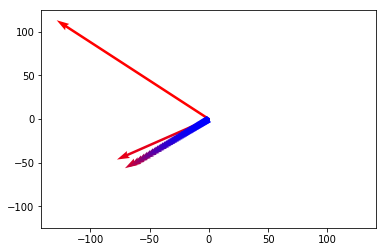

#iterations =  109

Matrix W:
[[ 0.78827573  0.20913211]
 [ 0.57897841  0.24674272]]

Eigenvalues: [ 0.95841452  0.07660393]

Norm: [171.25683116731224, 90.345067945908113, 90.486770797490351, 87.085307296424432, 83.491878051913076, 80.021979796011905, 76.694392397474957, 73.505032120126472, 70.448291253401749, 67.518665521079981, 64.710869604304534, 62.019837215236699, 59.440712691701883, 56.968842292085398, 54.599765802495824, 52.329208489138409, 50.153073385060964, 48.067433897636704, 46.068526723466832, 44.15274505792005, 42.316632087056654, 40.556874750194048, 38.870297761858964, 37.253857882339638, 35.704638426499812, 34.219844000946324, 32.796795460054092, 31.432925071747238, 30.125771884313433, 28.872977285891569, 27.672280748620206, 26.521515749767641, 25.418605862483719, 24.361561009119637, 23.348473870355186, 22.377516443654162, 21.446936744838084, 20.555055646826482, 19.70026384983974, 18.881018977597453, 18.095842794272784, 17.343318537181116, 16.622088360390066, 15.930850

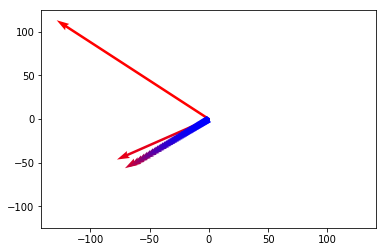

In [8]:
MAX_X = 100
MAX_Y = 100

W = sample_W_vanishing()
v = (MAX_X * np.random.normal(0, 1, 1), MAX_Y * np.random.normal(0, 1, 1))

x0, y0 = v
xlim = (-1.1 * abs(x0), 1.1 * abs(x0))
ylim = (-1.1 * abs(y0), 1.1 * abs(y0))

seq = []
threshold = 1
lin_seq_gen = linear_sequence(W, v, seq, lambda v: LA.norm(v) < threshold)
plot_vector_sequence(lin_seq_gen, xlim, ylim)
print_info(seq, W)

## Exploding vector

In [9]:
def sample_W_exploding():
    W = np.random.normal(0, 1, (2,2))
    while True:
        eigvals, _ = LA.eig(W)
        if np.all(np.isreal(eigvals)) and min(np.abs(eigvals)) > 1.0:
            break
        W = np.random.normal(0, 1, (2,2))
    return W

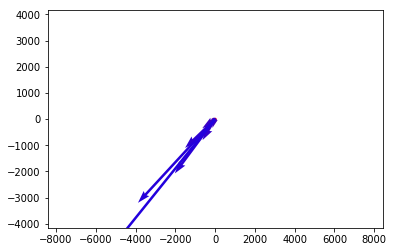

#iterations =  20

Matrix W:
[[-0.07723203  1.94165445]
 [ 0.87075942  0.6919495 ]]

Eigenvalues: [-1.04859995  1.66331742]

Norm: [93.872269696408537, 97.917989352790201, 103.54437147497974, 107.15628823465802, 114.78550848203832, 116.49603368162434, 128.99554522198665, 125.0259618668684, 150.83015019265471, 133.5726489692893, 197.79395614418925, 168.36597636038456, 332.09407383879625, 362.45076543358198, 732.49853208625916, 1019.6293623510616, 1869.4902956386509, 2901.291943939545, 5028.0716150064827, 8139.9435756470111]
Max norm: 8139.94357565


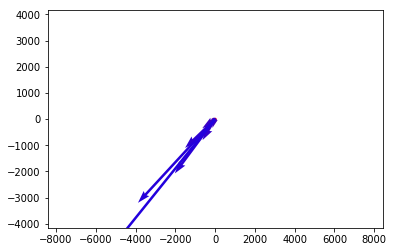

In [20]:
MAX_X = 100
MAX_Y = 100

W = sample_W_exploding()
v = (MAX_X * np.random.normal(0, 1, 1), MAX_Y * np.random.normal(0, 1, 1))

x0, y0 = v
xlim = (-100 * abs(x0), 100 * abs(x0))
ylim = (-100 * abs(y0), 100 * abs(y0))

threshold = LA.norm((xlim[1], ylim[1]))
seq = []
lin_seq_gen = linear_sequence(W, v, seq, lambda v: LA.norm(v) > threshold)
plot_vector_sequence(lin_seq_gen, xlim, ylim, delay=0.5)
print_info(seq, W)